# Import modules# 

In [168]:
import csv
import pandas as pd
import datetime
import ipaddress

# Read in the csv and add headers to the columns

In [169]:
df = pd.read_csv('c:/users/rusty/documents/moby/ipave/data/new_data.csv',
                 names = ['IP_Address', 'Subnet_mask', 'In_use?', 'unix_timestamp'])

# Combine IP_Address and Subnet_mask columns to create IP_Network column

In [170]:
df['IP_Network'] = df['IP_Address'] + '/' + df['Subnet_mask'].map(str)
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network
0,10.128.0.0,22,0,1525670182,10.128.0.0/22
1,10.128.4.0,22,0,1525670192,10.128.4.0/22
2,10.128.8.0,22,0,1525670202,10.128.8.0/22
3,10.128.12.0,22,0,1525670212,10.128.12.0/22
4,10.128.16.0,22,0,1525670222,10.128.16.0/22
5,10.128.128.0,24,0,1525670222,10.128.128.0/24
6,10.128.129.0,24,0,1525670222,10.128.129.0/24
7,10.128.130.0,24,0,1525670222,10.128.130.0/24
8,10.128.131.0,24,0,1525670222,10.128.131.0/24
9,10.128.132.0,22,0,1525670222,10.128.132.0/22


# Convert IP_Address column to ipaddress.ip_address object and IP_Network column to ipaddress.ip_network object

In [171]:
df['IP_Address'] = df['IP_Address'].apply(ipaddress.ip_address)
df['IP_Network'] = df['IP_Network'].apply(ipaddress.ip_network)

In [172]:
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network
0,10.128.0.0,22,0,1525670182,10.128.0.0/22
1,10.128.4.0,22,0,1525670192,10.128.4.0/22
2,10.128.8.0,22,0,1525670202,10.128.8.0/22
3,10.128.12.0,22,0,1525670212,10.128.12.0/22
4,10.128.16.0,22,0,1525670222,10.128.16.0/22
5,10.128.128.0,24,0,1525670222,10.128.128.0/24
6,10.128.129.0,24,0,1525670222,10.128.129.0/24
7,10.128.130.0,24,0,1525670222,10.128.130.0/24
8,10.128.131.0,24,0,1525670222,10.128.131.0/24
9,10.128.132.0,22,0,1525670222,10.128.132.0/22


# Create dictionary for ratio of 24 to 22 subnet masks

In [173]:
dic = {22:4, 24:1}

# Add new column to hold ratio values

In [174]:
df['mask_conversion'] = df['Subnet_mask'].map(dic)

# Display new dataframe to verify new column addition

In [175]:
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network,mask_conversion
0,10.128.0.0,22,0,1525670182,10.128.0.0/22,4
1,10.128.4.0,22,0,1525670192,10.128.4.0/22,4
2,10.128.8.0,22,0,1525670202,10.128.8.0/22,4
3,10.128.12.0,22,0,1525670212,10.128.12.0/22,4
4,10.128.16.0,22,0,1525670222,10.128.16.0/22,4
5,10.128.128.0,24,0,1525670222,10.128.128.0/24,1
6,10.128.129.0,24,0,1525670222,10.128.129.0/24,1
7,10.128.130.0,24,0,1525670222,10.128.130.0/24,1
8,10.128.131.0,24,0,1525670222,10.128.131.0/24,1
9,10.128.132.0,22,0,1525670222,10.128.132.0/22,4


# Create new column for number of addresses per subnet

In [176]:
df['num_addresses'] = (df['mask_conversion']*256)
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network,mask_conversion,num_addresses
0,10.128.0.0,22,0,1525670182,10.128.0.0/22,4,1024
1,10.128.4.0,22,0,1525670192,10.128.4.0/22,4,1024
2,10.128.8.0,22,0,1525670202,10.128.8.0/22,4,1024
3,10.128.12.0,22,0,1525670212,10.128.12.0/22,4,1024
4,10.128.16.0,22,0,1525670222,10.128.16.0/22,4,1024
5,10.128.128.0,24,0,1525670222,10.128.128.0/24,1,256
6,10.128.129.0,24,0,1525670222,10.128.129.0/24,1,256
7,10.128.130.0,24,0,1525670222,10.128.130.0/24,1,256
8,10.128.131.0,24,0,1525670222,10.128.131.0/24,1,256
9,10.128.132.0,22,0,1525670222,10.128.132.0/22,4,1024


# Summing num_addresses column to get count of total IP addresses

In [177]:
IP_count = df['num_addresses'].sum()
print("Number of IP Addresses:", IP_count)

Number of IP Addresses: 7168


# total addresses = number of addresses in a /16 network
### Caluculated percent of a /16 network

In [178]:
total_addresses = 65534
pct_used = (IP_count/total_addresses)*100
print("percent used:", pct_used)

percent used: 10.937833796197394


# Convert unix_timestamp to datetime and display new dataframe

In [196]:
df['date'] = pd.to_datetime(df['unix_timestamp'], unit='s')
df

,IP_Address,Subnet_mask,In_use?,unix_timestamp,IP_Network,mask_conversion,num_addresses,date
0,10.128.0.0,22,0,1525670182,10.128.0.0/22,4,1024,2018-05-07 05:16:22
1,10.128.4.0,22,0,1525670192,10.128.4.0/22,4,1024,2018-05-07 05:16:32
2,10.128.8.0,22,0,1525670202,10.128.8.0/22,4,1024,2018-05-07 05:16:42
3,10.128.12.0,22,0,1525670212,10.128.12.0/22,4,1024,2018-05-07 05:16:52
4,10.128.16.0,22,0,1525670222,10.128.16.0/22,4,1024,2018-05-07 05:17:02
5,10.128.128.0,24,0,1525670222,10.128.128.0/24,1,256,2018-05-07 05:17:02
6,10.128.129.0,24,0,1525670222,10.128.129.0/24,1,256,2018-05-07 05:17:02
7,10.128.130.0,24,0,1525670222,10.128.130.0/24,1,256,2018-05-07 05:17:02
8,10.128.131.0,24,0,1525670222,10.128.131.0/24,1,256,2018-05-07 05:17:02
9,10.128.132.0,22,0,1525670222,10.128.132.0/22,4,1024,2018-05-07 05:17:02


In [197]:
ip_per_10sec = df[['date', 'num_addresses']]

In [198]:
ip_per_10sec = ip_per_10sec.set_index(['date'])
ip_per_10sec
#df['minute'] = df['date'].apply()

,num_addresses
date,
2018-05-07 05:16:22,1024
2018-05-07 05:16:32,1024
2018-05-07 05:16:42,1024
2018-05-07 05:16:52,1024
2018-05-07 05:17:02,1024
2018-05-07 05:17:02,256
2018-05-07 05:17:02,256
2018-05-07 05:17:02,256
2018-05-07 05:17:02,256


In [199]:
#ip_per_10sec.index = ip_per_10sec.index.map(lambda x: x.replace(second=0))
ip_per_10sec = ip_per_10sec.groupby(['date']).sum()

In [200]:
ip_per_10sec

,num_addresses
date,
2018-05-07 05:16:22,1024
2018-05-07 05:16:32,1024
2018-05-07 05:16:42,1024
2018-05-07 05:16:52,1024
2018-05-07 05:17:02,3072


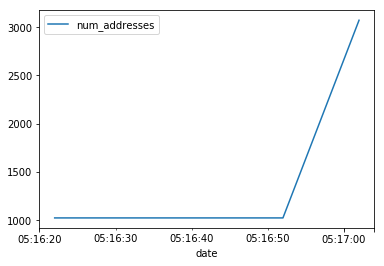

In [201]:
%matplotlib inline
ip_per_10sec.plot()

In [203]:
#for i, row in ip_per_10sec.iterrows():
#  ifor_val = something
#  if <condition>:
#    ifor_val = something_else
#  df.set_value(i,'ifor',ifor_val)


#for i in ip_per_10sec.index:
#    if <something>:
#        df.at[i, 'ifor'] = x
#    else:
#        df.at[i, 'ifor'] = y

ip_per_10sec['ip_cum'] = ip_per_10sec['num_addresses'].cumsum()

ip_per_10sec

,num_addresses,ip_cum
date,,
2018-05-07 05:16:22,1024,1024
2018-05-07 05:16:32,1024,2048
2018-05-07 05:16:42,1024,3072
2018-05-07 05:16:52,1024,4096
2018-05-07 05:17:02,3072,7168


In [205]:
ip = ip_per_10sec.reset_index()
ips_over_time = ip[['date', 'ip_cum']]

In [207]:
ips_over_time = ips_over_time.set_index(['date'])